In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [75]:
def PolynomialRegression(degree=1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

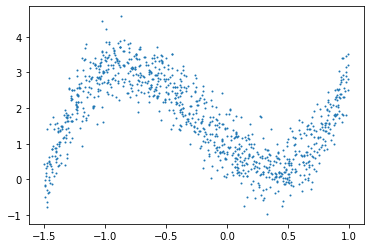

In [76]:
""" Data Gerneration """
n = 1000
X = (2.5 * np.random.rand(n))-1.5
X.sort()
y = 3*(X**3) + 2*(X**2) - 3*X + 1 + np.random.normal(0, 0.5, size=1000)
X = X[:, np.newaxis]

plt.scatter(X, y, s=1)
plt.show()

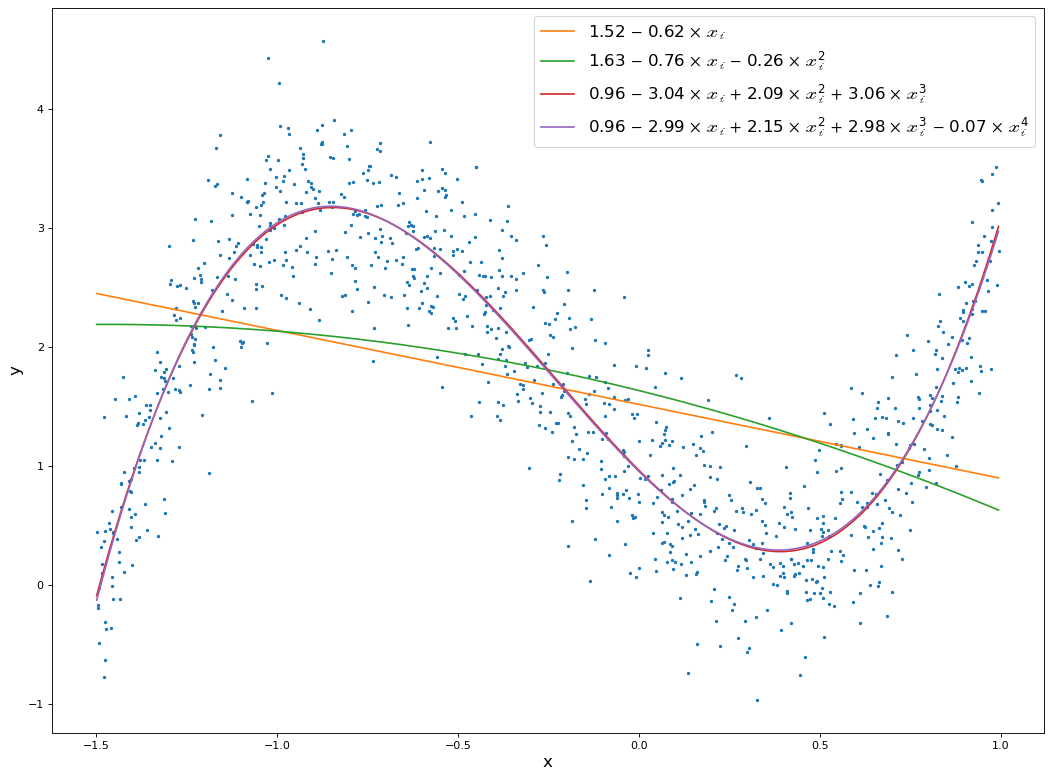

In [82]:
figure(figsize=(16, 12), dpi=80)
plt.plot(X,y,'o',markersize=2)
for i in range(4):
    clf=PolynomialRegression(degree=i+1).fit(X,y)
    coef = clf.steps[1][1].coef_
    intercept = clf.steps[1][1].intercept_

    # print the equation in latex form
    poly = '%.2f' % round(intercept, 2)
    for ii in range(i+1):
        if(coef[ii+1]>0): poly = poly + r' $\mathscr{\plus}$ '
        else: poly = poly + r' $\mathscr{\minus}$ '
        poly = poly + '%.2f' % abs(round(coef[ii+1], 2)) + r' $\mathscr{\times}$ '
        if(ii>0): poly = poly + r'$\mathscr{x}_\mathscr{i}^%d$' % (ii+1)
        else: poly = poly +  r'$\mathscr{x}_\mathscr{i}$'
    
    ypred = clf.predict(X)
    plt.plot(X,ypred, label=poly)
    plt.legend(loc='upper right', fontsize=15)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
plt.show()